# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns
import datacamp as dc  # datacamp helpfull functions
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


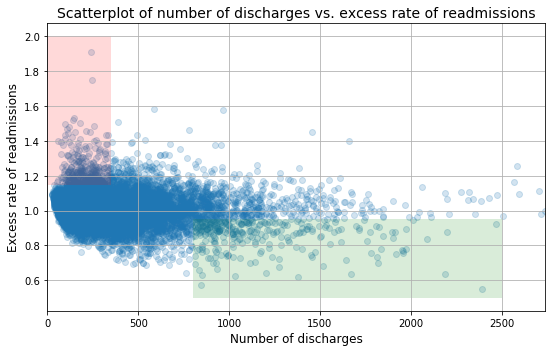

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

----
### Solutions


# A. Do you agree with the above analysis and recommendations? 
## Why or why not?

- disagree with the premilinary analysis and recomendations  because the graph is not very clear on what the boxes represent. The recomendations is based only on the graph alone and needs further review.



## B. Provide support for your arguments and your own recommendations with a statistically sound analysis

#### 1. Setup an appropriate hypothesis test.
- $H_o$: that there is **no** difference in means excess readmission ratges.
- $H_a$:  that there **is** a difference in means exxess readmission rates.

In [5]:
plt.style.use('ggplot')

# lets cleanup our dataset
clean_hospital_read_df.rename(
    columns = {'Number of Discharges':'number_of_discharges',
               'Excess Readmission Ratio':'excess_readmission_ratio',
               'Number of Readmissions':'number_readmissions'},
    inplace = True)
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df.excess_readmission_ratio.notnull()]

In [6]:
df = clean_hospital_read_df[['number_of_discharges','excess_readmission_ratio']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
number_of_discharges        11497 non-null int64
excess_readmission_ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


#### Split the data into two groups, compare statistics from part B
- hospitals with discharges < 100
- hospitals with discarges > 1000

In [7]:
df_100 = df[df.number_of_discharges < 100]
df_100_ex_mean= df_100.excess_readmission_ratio.mean()
df_100_ex_std = df_100.excess_readmission_ratio.std()
df_100_grt1 = df_100[df_100.excess_readmission_ratio>1]
df_100_rate = len(df_100_grt1)/len(df_100)

print('Mean of excess readmission rate: {}\nExcess radmission rate > 1: {}'.format(df_100_ex_mean,df_100_rate))
print('Std: {}'.format(df_100_ex_std))

Mean of excess readmission rate: 1.0226183501683501
Excess radmission rate > 1: 0.6321548821548821
Std: 0.05797860323426277


In [8]:
df_1000 = df[df.number_of_discharges > 1000]
df_1000_ex_mean= df_1000.excess_readmission_ratio.mean()
df_1000_ex_std = df_1000.excess_readmission_ratio.std()
df_1000_grt1 = df_1000[df_1000.excess_readmission_ratio>1]
df_1000_rate = len(df_1000_grt1)/len(df_1000)

print('Mean of excess readmission rate: {}\nExcess radmission rate > 1: {}'.format(df_1000_ex_mean,df_1000_rate))
print('Std: {}'.format(df_1000_ex_std))

Mean of excess readmission rate: 0.9783354211663067
Excess radmission rate > 1: 0.4449244060475162
Std: 0.12000735348224047


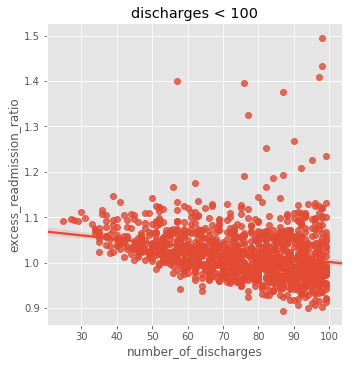

In [9]:
#_ = plt.subplot(1,2,1)
_ = sns.lmplot(x='number_of_discharges', y='excess_readmission_ratio', data=df_100)
_ = plt.title('discharges < 100')

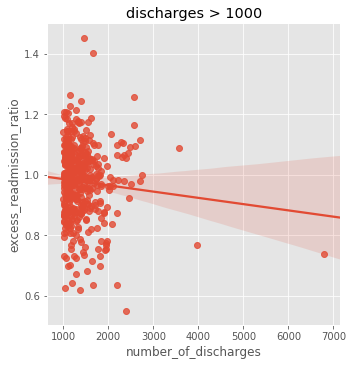

In [10]:
#_ = plt.subplot(1,2,2)
_ = sns.lmplot(x='number_of_discharges', y='excess_readmission_ratio', data=df_1000)
_ = plt.title('discharges > 1000')

### 2 Compute and report the observed significance value (or p-value).
#### Checking if the datasets are normally distributed.


In [13]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [14]:
x = df.number_of_discharges
y = df.excess_readmission_ratio

slope, intercept, r, p, std_error = stats.linregress(x,y)

In [15]:
print("Slope:{}\nIntercept:{}\nr:{}\nr-squared:{}\np-value:{}".format(slope,intercept,r,r**2,p))

Slope:-2.9010517330570684e-05
Intercept:1.018106147373357
r:-0.09739794351079352
r-squared:0.009486359400131726
p-value:1.2225473776734486e-25


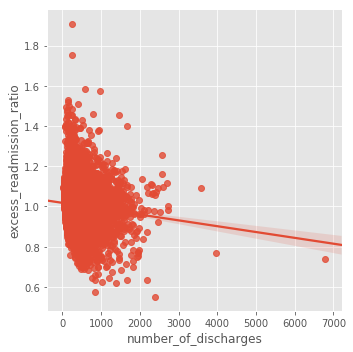

In [16]:
sns.lmplot(x='number_of_discharges', y='excess_readmission_ratio', data=df)
plt.show()

- p-value is small,null  hypothesis rejected

In [17]:
a = df[df.number_of_discharges < 300].excess_readmission_ratio.as_matrix()
a_mean = df[df.number_of_discharges < 300].excess_readmission_ratio.mean()
a_std = df[df.number_of_discharges < 300].excess_readmission_ratio.std()


b = df[df.number_of_discharges >= 300].excess_readmission_ratio.as_matrix()
b_mean = df[df.number_of_discharges >= 300].excess_readmission_ratio.mean()
b_std = df[df.number_of_discharges > 300].excess_readmission_ratio.std()

In [18]:
stats.ttest_ind(a, b, axis=0, equal_var=False)

Ttest_indResult(statistic=8.279706368011247, pvalue=1.3862099593114599e-16)

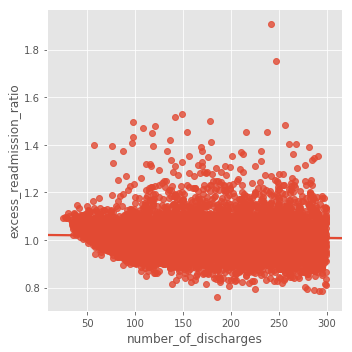

In [23]:
l_300 = df[df.number_of_discharges < 300]
sns.lmplot(x='number_of_discharges', y='excess_readmission_ratio', data=l_300)
plt.show()

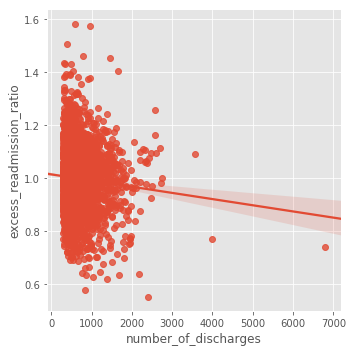

In [24]:
m_300 = df[df.number_of_discharges > 300]
sns.lmplot(x='number_of_discharges', y='excess_readmission_ratio', data=m_300)
plt.show()

- p value small, null hypothesis rejected